
# The Sparks Foundation





---



NAME :SATHIYAMOORTHI D

**TASK 1 - Prediction using Supervised ML**

Task Description : Predict the percentage of an student based on the no. of study hours.





In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**LOADING DATASET**

Data can be found at http://bit.ly/w-data

In [ ]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Check if there any null value in the Dataset
data.isnull == True


False

**There is no null value in the Dataset so, we can now visualize our Data.**

In [ ]:
data.info()
#  Checking the correlation between hours and scores 
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


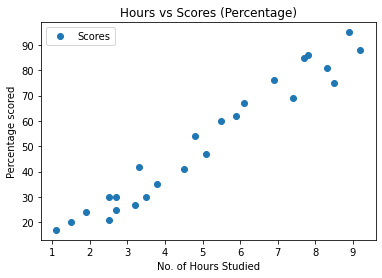

In [ ]:
data.plot(x="Hours", y="Scores",style="o")
plt.title("Hours vs Scores (Percentage)")
plt.xlabel("No. of Hours Studied")
plt.ylabel("Percentage scored")
plt.show()

From the above graph , as we can see that  there is positive correlation between the Hours studied and the Percentage score. Hence it is a Linear Regression.



## **Training the Model**
1) Splitting the Data

In [ ]:
# Selecting the Values for x and y labels


x = data.iloc[:, :-1].values
y = data.iloc[:,1].values


Now , splitting the data into testing and training datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state = 0)



The values taken from the training dataset are trained using linear regression model algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Model trained Successfully")

Model trained Successfully



**PLOTTING THE REGRESSION LINE**

Now, Printing the coefficient and intercept values required to plot the regression line.

In [ ]:
reg.coef_

array([9.78856669])

In [ ]:
reg.intercept_

2.3708153823418883

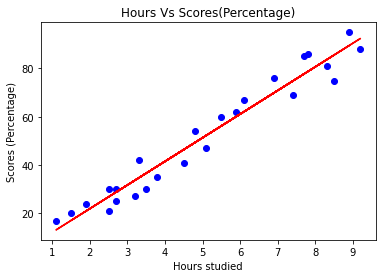

In [ ]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y,color="blue")
plt.title("Hours Vs Scores(Percentage)")
plt.xlabel("Hours studied")
plt.ylabel("Scores (Percentage)")
plt.plot(x,line,color="red")
plt.show()

**PREDICTING THE SCORES**

In [ ]:
#Testing the data In Hours
print(x_test)

#Predicting the scores
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


Comparing Predicted data with Actual Data

In [ ]:

data = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


***What will be predicted score if a student studies for 9.25 hrs/ day?***

In [ ]:
#predict values by own data
hours = [9.25]
own_pred = reg.predict([hours])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = [9.25]
Predicted Score = 92.91505723477056


### **EVALUATING THE MODEL**


They are used for verifying how well distinct algorithms perform well on datasets. Here , i have evaluated the model using mean absolute error, mean squared error and root mean squared error

In [ ]:
from sklearn import metrics
print("Mean Absolure error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolure error: 4.419727808027651
Mean Squared error: 22.965097212700428
Root Mean Squared error: 4.7921912746363144


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.91 marks.